In [1]:
import planetary_computer
import xarray as xr
import fsspec
import pystac_client


In [2]:
catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)

In [3]:
collection = catalog.get_collection("nasa-nex-gddp-cmip6")

In [4]:
collection.summaries.get_list("cmip6:model")

['ACCESS-CM2',
 'ACCESS-ESM1-5',
 'BCC-CSM2-MR',
 'CESM2',
 'CESM2-WACCM',
 'CMCC-CM2-SR5',
 'CMCC-ESM2',
 'CNRM-CM6-1',
 'CNRM-ESM2-1',
 'CanESM5',
 'EC-Earth3',
 'EC-Earth3-Veg-LR',
 'FGOALS-g3',
 'GFDL-CM4',
 'GFDL-CM4_gr2',
 'GFDL-ESM4',
 'GISS-E2-1-G',
 'HadGEM3-GC31-LL',
 'HadGEM3-GC31-MM',
 'IITM-ESM',
 'INM-CM4-8',
 'INM-CM5-0',
 'IPSL-CM6A-LR',
 'KACE-1-0-G',
 'KIOST-ESM',
 'MIROC-ES2L',
 'MIROC6',
 'MPI-ESM1-2-HR',
 'MPI-ESM1-2-LR',
 'MRI-ESM2-0',
 'NESM3',
 'NorESM2-LM',
 'NorESM2-MM',
 'TaiESM1',
 'UKESM1-0-LL']

In [5]:
# List the scenarios
collection.summaries.get_list("cmip6:scenario")

['historical', 'ssp245', 'ssp585']

In [6]:
# list the variables
collection.summaries.get_list("cmip6:variable")

['hurs', 'huss', 'pr', 'rlds', 'rsds', 'sfcWind', 'tas', 'tasmax', 'tasmin']

In [8]:
search = catalog.search(
    collections=["nasa-nex-gddp-cmip6"],
    datetime="1950/2000",
    query={"cmip6:model": {"eq": "HadGEM3-GC31-LL"}},
)
items = search.item_collection()
len(items)
items

In [10]:
item_yr_2000, item_yr_1950 = items[0], items[50]

In [11]:
item_yr_2000

<Item id=HadGEM3-GC31-LL.historical.2000>

In [12]:
pr_2000 = xr.open_dataset(fsspec.open(item_yr_2000.assets["pr"].href).open())
pr_1950 = xr.open_dataset(fsspec.open(item_yr_1950.assets["pr"].href).open())


In [13]:
pr_1950

<xarray.Dataset>
Dimensions:  (time: 360, lat: 600, lon: 1440)
Coordinates:
  * time     (time) object 1950-01-01 12:00:00 ... 1950-12-30 12:00:00
  * lat      (lat) float64 -59.88 -59.62 -59.38 -59.12 ... 89.38 89.62 89.88
  * lon      (lon) float64 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
Data variables:
    pr       (time, lat, lon) float32 ...
Attributes: (12/22)
    activity:              NEX-GDDP-CMIP6
    contact:               Dr. Rama Nemani: rama.nemani@nasa.gov, Dr. Bridget...
    Conventions:           CF-1.7
    creation_date:         2021-10-04T18:47:26.421966+00:00
    frequency:             day
    institution:           NASA Earth Exchange, NASA Ames Research Center, Mo...
    ...                    ...
    history:               2021-10-04T18:47:26.421966+00:00: install global a...
    disclaimer:            This data is considered provisional and subject to...
    external_variables:    areacella
    cmip6_source_id:       HadGEM3-GC31-LL
    cmip6_institution_id:  MOHC
    cmip6_license:         CC-BY-SA 4.0

In [14]:
pr_2000

<xarray.Dataset>
Dimensions:  (time: 360, lat: 600, lon: 1440)
Coordinates:
  * time     (time) object 2000-01-01 12:00:00 ... 2000-12-30 12:00:00
  * lat      (lat) float64 -59.88 -59.62 -59.38 -59.12 ... 89.38 89.62 89.88
  * lon      (lon) float64 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
Data variables:
    pr       (time, lat, lon) float32 ...
Attributes: (12/22)
    activity:              NEX-GDDP-CMIP6
    contact:               Dr. Rama Nemani: rama.nemani@nasa.gov, Dr. Bridget...
    Conventions:           CF-1.7
    creation_date:         2021-10-04T18:47:38.680330+00:00
    frequency:             day
    institution:           NASA Earth Exchange, NASA Ames Research Center, Mo...
    ...                    ...
    history:               2021-10-04T18:47:38.680330+00:00: install global a...
    disclaimer:            This data is considered provisional and subject to...
    external_variables:    areacella
    cmip6_source_id:       HadGEM3-GC31-LL
    cmip6_institution_id:  MOHC
    cmip6_license:         CC-BY-SA 4.0

In [19]:
pr_HADGEM_2000_m=pr_2000.groupby('time.month').mean()
pr_HADGEM_1950_m=pr_1950.groupby('time.month').mean()
%%time
#ds = xr.open_mfdataset(
#    [fsspec.open(asset.href).open() for asset in item.assets.values()]
#)

In [26]:
pr_HADGEM_2000_m

<xarray.Dataset>
Dimensions:  (month: 12, lat: 600, lon: 1440)
Coordinates:
  * lat      (lat) float64 -59.88 -59.62 -59.38 -59.12 ... 89.38 89.62 89.88
  * lon      (lon) float64 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    pr       (month, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
Attributes: (12/22)
    activity:              NEX-GDDP-CMIP6
    contact:               Dr. Rama Nemani: rama.nemani@nasa.gov, Dr. Bridget...
    Conventions:           CF-1.7
    creation_date:         2021-10-04T18:47:38.680330+00:00
    frequency:             day
    institution:           NASA Earth Exchange, NASA Ames Research Center, Mo...
    ...                    ...
    history:               2021-10-04T18:47:38.680330+00:00: install global a...
    disclaimer:            This data is considered provisional and subject to...
    external_variables:    areacella
    cmip6_source_id:       HadGEM3-GC31-LL
    cmip6_institution_id:  MOHC
    cmip6_license:         CC-BY-SA 4.0

In [31]:
pr_2000

<xarray.Dataset>
Dimensions:  (time: 360, lat: 600, lon: 1440)
Coordinates:
  * time     (time) object 2000-01-01 12:00:00 ... 2000-12-30 12:00:00
  * lat      (lat) float64 -59.88 -59.62 -59.38 -59.12 ... 89.38 89.62 89.88
  * lon      (lon) float64 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
Data variables:
    pr       (time, lat, lon) float32 ...
Attributes: (12/22)
    activity:              NEX-GDDP-CMIP6
    contact:               Dr. Rama Nemani: rama.nemani@nasa.gov, Dr. Bridget...
    Conventions:           CF-1.7
    creation_date:         2021-10-04T18:47:38.680330+00:00
    frequency:             day
    institution:           NASA Earth Exchange, NASA Ames Research Center, Mo...
    ...                    ...
    history:               2021-10-04T18:47:38.680330+00:00: install global a...
    disclaimer:            This data is considered provisional and subject to...
    external_variables:    areacella
    cmip6_source_id:       HadGEM3-GC31-LL
    cmip6_institution_id:  MOHC
    cmip6_license:         CC-BY-SA 4.0

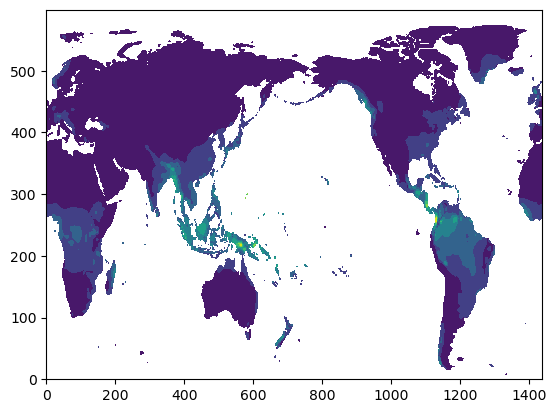

In [35]:
daily_mean_1950=pr_1950.mean(dim='time')
plt.contourf(daily_mean_1950['pr'])

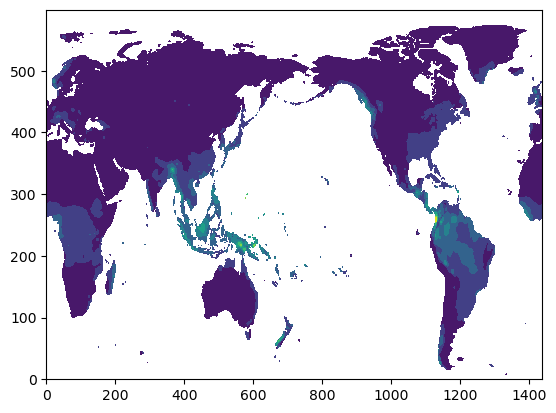

In [33]:
daily_mean_2000=pr_2000.mean(dim='time')
plt.contourf(daily_mean_2000['pr'])

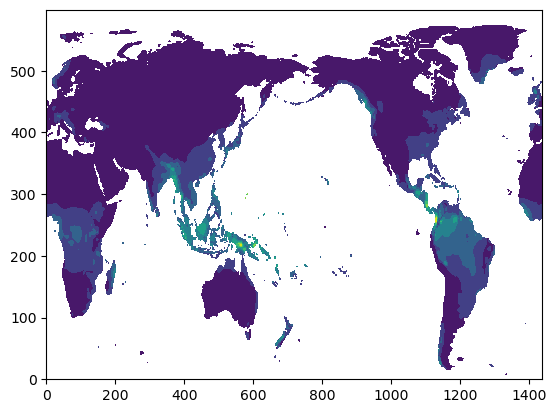

In [36]:
ds_mean_1950=pr_HADGEM_1950_m.mean(dim='month')
plt.contourf(ds_mean_1950['pr'])

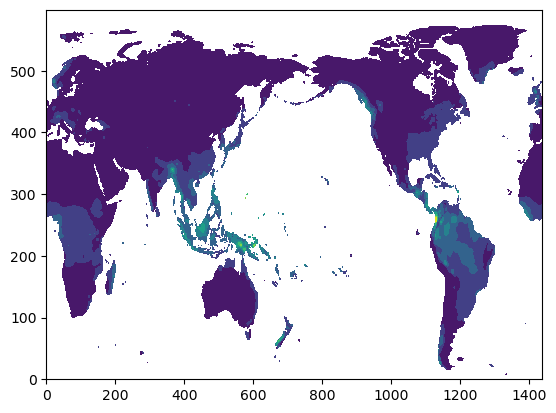

In [29]:
ds_mean_2000=pr_HADGEM_2000_m.mean(dim='month')
plt.contourf(ds_mean_2000['pr'])

Text(0.5, 1.0, 'NEX-GDDP-CMIP6-HADGEM3-GC31-LL Historical 2000 Daily Average')

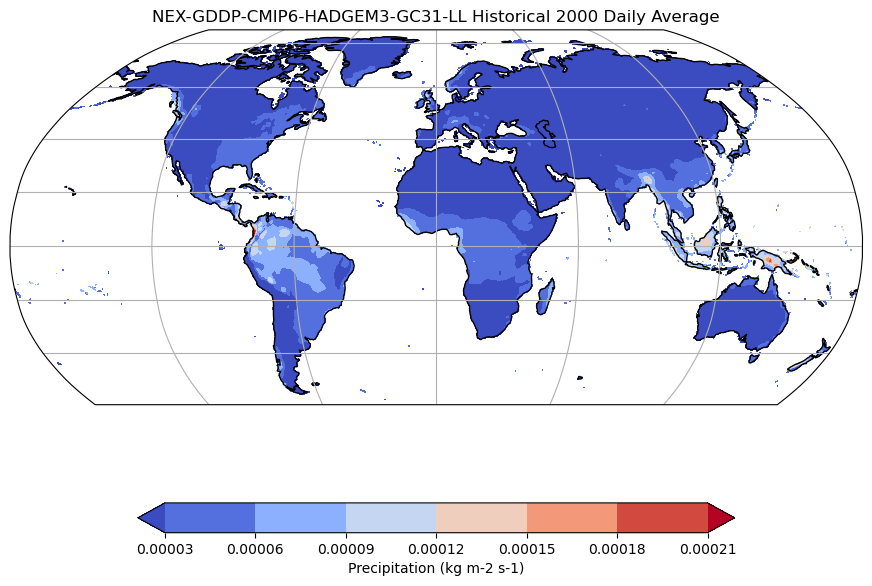

In [37]:
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import cartopy.mpl.ticker as cticker

fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.Robinson())

# Add cyclic point
data=daily_mean_2000['pr']
data,lon=add_cyclic_point(data,coord=ds_mean['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,ds_mean['lat'],
            data,
            transform=ccrs.PlateCarree(),
           cmap='coolwarm',extend='both')

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()

# Define the xticks for longtitude 
#ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
#lon_formatter=cticker.LongitudeFormatter()
#ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
#ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
#lat_formatter=cticker.LatitudeFormatter()
#ax.yaxis.set_major_formatter(lat_formatter)

# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Precipitation (kg m-2 s-1)')

# Add title
plt.title('NEX-GDDP-CMIP6-HADGEM3-GC31-LL Historical 2000 Daily Average')